In [1]:
import numpy as np
import matplotlib.pyplot as plt
import thomson
import time

In [2]:
def maxwellian_e(v, T, v_d):
    v_unitless = v
    T_K = T * 11605
    vth = np.sqrt(2 * 1.5156e7 * T_K)
    exp_term = -(v_unitless - v_d) ** 2 / (vth ** 2)
    return np.exp(exp_term) / np.sqrt(np.pi * vth ** 2)

def maxwellian_H(v, T, v_d):
    v_unitless = v
    T_K = T * 11605
    vth = np.sqrt(2 * 8.2544e3 * T_K)
    exp_term = -(v_unitless - v_d) ** 2 / (vth ** 2)
    return np.exp(exp_term) / np.sqrt(np.pi * vth ** 2)

In [3]:
ve = np.linspace(-2e7, 2e7, 1000)
fe = maxwellian_e(ve, 100, 0)

In [11]:
probe_wavelength = 532e-9
wavelengths = np.linspace(probe_wavelength-50e-9, probe_wavelength+50e-9, 200)

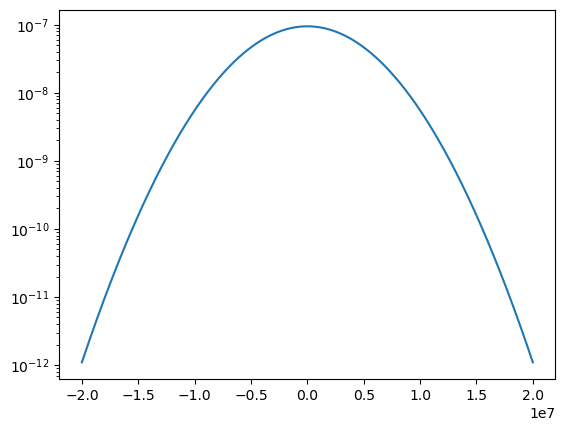

In [12]:
plt.semilogy(ve, fe)

In [13]:
thomson.vth_nonmaxwellian(fe, ve)

4193777.1300845332

In [14]:
t0 = time.time()
chi = thomson.chi_lite(wavelengths, probe_wavelength, fe, ve, 4e24, np.array([1,0,0]), np.array([0,1,0]), 1, 1/1836)
t = time.time()
print(t - t0)

0.03800082206726074


C:\Users\bfoo\Documents\GitHub\PlasmaPy\src\plasmapy\diagnostics\thomson.py:57: UserWarning: Differences are unevenly spaced.
  warnings.warn("Differences are unevenly spaced.")


In [15]:
chi

array([ 2.03588368e-38-3.00111431e-41j,  2.08988115e-38-3.00455267e-41j,
        2.14621111e-38-3.00798816e-41j,  2.20507359e-38-3.01142076e-41j,
        2.26682124e-38-3.01485049e-41j,  2.33154376e-38-3.77250765e-41j,
        2.39891373e-38-4.77104481e-41j,  2.46933784e-38-6.01403943e-41j,
        2.54305012e-38-7.56004433e-41j,  2.62029519e-38-9.47149663e-41j,
        2.70133001e-38-1.18341760e-40j,  2.78640918e-38-1.47377912e-40j,
        2.87583630e-38-1.83007185e-40j,  2.96989294e-38-2.26553738e-40j,
        3.06893432e-38-2.79593913e-40j,  3.17327270e-38-3.44070193e-40j,
        3.28329476e-38-4.22045729e-40j,  3.39941316e-38-5.16263429e-40j,
        3.52198827e-38-6.29529764e-40j,  3.65151949e-38-7.65341539e-40j,
        3.78837486e-38-9.27763525e-40j,  3.93306646e-38-1.12110109e-39j,
        4.08611888e-38-1.35092891e-39j,  4.24791671e-38-1.62288514e-39j,
        4.41384753e-38-1.94362052e-39j,  4.59470473e-38-2.32122224e-39j,
        4.78582273e-38-2.76357628e-39j,  4.98781598

In [16]:
t0

1727191991.1727092

C:\Users\bfoo\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\bfoo\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


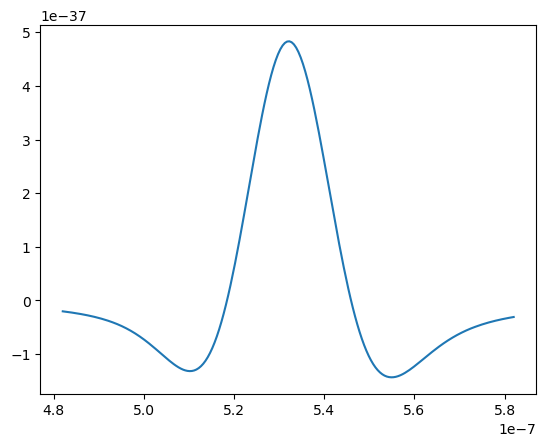

In [17]:
plt.plot(wavelengths, -chi)